# 1) Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1)

# 2) Reading Data

In [2]:
df=pd.read_csv('C:/Users/Abd AL-Rahman/Desktop/2nd graduation project/used_cars_data.csv')
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [4]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


# 3) finding nulls

In [5]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [6]:
df.drop(['New_Price','S.No.'],axis=1,inplace=True)

In [7]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
Price                1234
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [9]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 560.3+ KB


# 4) Data preprocessing 

In [11]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [12]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [13]:
columns=['Name', 'Location','Year','Fuel_Type','Transmission','Owner_Type','Seats']
for col in columns:
    print(f'Feature ({col}):')
    print(f'unique values:{df[col].unique()}')
    print(f'number of unique values: {len(df[col].unique())}')
    print('-'*30)
          

Feature (Name):
unique values:['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Volkswagen Polo IPL II 1.2 Petrol Highline'
 'Tata Bolt Revotron XT' 'Mahindra Xylo D4 BSIV']
number of unique values: 1855
------------------------------
Feature (Location):
unique values:['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
number of unique values: 11
------------------------------
Feature (Year):
unique values:[2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998]
number of unique values: 22
------------------------------
Feature (Fuel_Type):
unique values:['CNG' 'Diesel' 'Petrol' 'LPG']
number of unique values: 4
------------------------------
Feature (Transmission):
unique values:['Manual' 'Automatic']
number of unique values: 2
------------------------------
Feature (Owner_Type):
unique values:['First' 'Second' 'Fourth & Above' 'Third']
n

In [14]:
df['Name']=df['Name'].apply(lambda x: x.split()[0])
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5971,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5972,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5973,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [15]:
df['Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [16]:
len(df['Name'].unique())

31

In [17]:
df[df['Name']=='ISUZU']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3597,ISUZU,Coimbatore,2018,20422,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,16.09
5935,ISUZU,Jaipur,2017,25000,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,8.00


In [18]:
df['Name'].replace('ISUZU','Isuzu',inplace=True)

In [19]:
df['Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [20]:
len(df['Name'].unique())

30

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 560.3+ KB


In [22]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [23]:
df['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.,  0.])

In [24]:
df[df['Seats']==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3969,Audi,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,18.0


In [25]:
df.drop([3969],axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [26]:
df['Seats']=df['Seats'].apply(lambda x: int(x))

In [27]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,17.74


In [28]:
df['Year']=df['Year'].apply(lambda x: int(x))

In [29]:
df['Mileage']=df['Mileage'].apply(lambda x: float(x.split()[0]))

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5974 non-null   object 
 1   Location           5974 non-null   object 
 2   Year               5974 non-null   int64  
 3   Kilometers_Driven  5974 non-null   int64  
 4   Fuel_Type          5974 non-null   object 
 5   Transmission       5974 non-null   object 
 6   Owner_Type         5974 non-null   object 
 7   Mileage            5974 non-null   float64
 8   Engine             5974 non-null   object 
 9   Power              5974 non-null   object 
 10  Seats              5974 non-null   int64  
 11  Price              5974 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 560.2+ KB


In [31]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5,17.74


In [32]:
df['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [33]:
df[df['Power']=='null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399 CC,null bhp,5,2.00
79,Hyundai,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086 CC,null bhp,5,1.30
89,Hyundai,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086 CC,null bhp,5,2.10
120,Hyundai,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086 CC,null bhp,5,0.85
143,Hyundai,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086 CC,null bhp,5,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5817,Hyundai,Chennai,2007,79000,Petrol,Manual,First,17.00,1086 CC,null bhp,5,1.85
5829,Hyundai,Pune,2006,47200,Petrol,Manual,Second,17.00,1086 CC,null bhp,5,1.20
5880,Skoda,Pune,2010,85000,Petrol,Manual,First,17.50,1798 CC,null bhp,5,2.85
5898,Mahindra,Chennai,2002,75000,Diesel,Manual,First,0.00,2112 CC,null bhp,6,1.70


In [35]:
nullindicies=(df[df['Power']=='null bhp'].index).tolist()

In [36]:
for i in nullindicies:
    df.drop([i],axis=0,inplace=True)

In [37]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [38]:
df.shape

(5872, 12)

In [39]:
df['Power']=df['Power'].apply(lambda x: round(float(x.split()[0])))

In [40]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58,5,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126,5,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,89,5,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,89,7,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,141,5,17.74


In [41]:
df['Engine']=df['Engine'].apply(lambda x: int(x.split()[0]))

In [42]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58,5,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126,5,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,89,5,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,89,7,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,141,5,17.74


In [43]:
df['Price']=df['Price'].apply(lambda x: x*100000)

In [44]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58,5,175000.0
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126,5,1250000.0
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,89,5,450000.0
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,89,7,600000.0
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,141,5,1774000.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   int64  
 9   Power              5872 non-null   int64  
 10  Seats              5872 non-null   int64  
 11  Price              5872 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 550.6+ KB


# 5) visualization

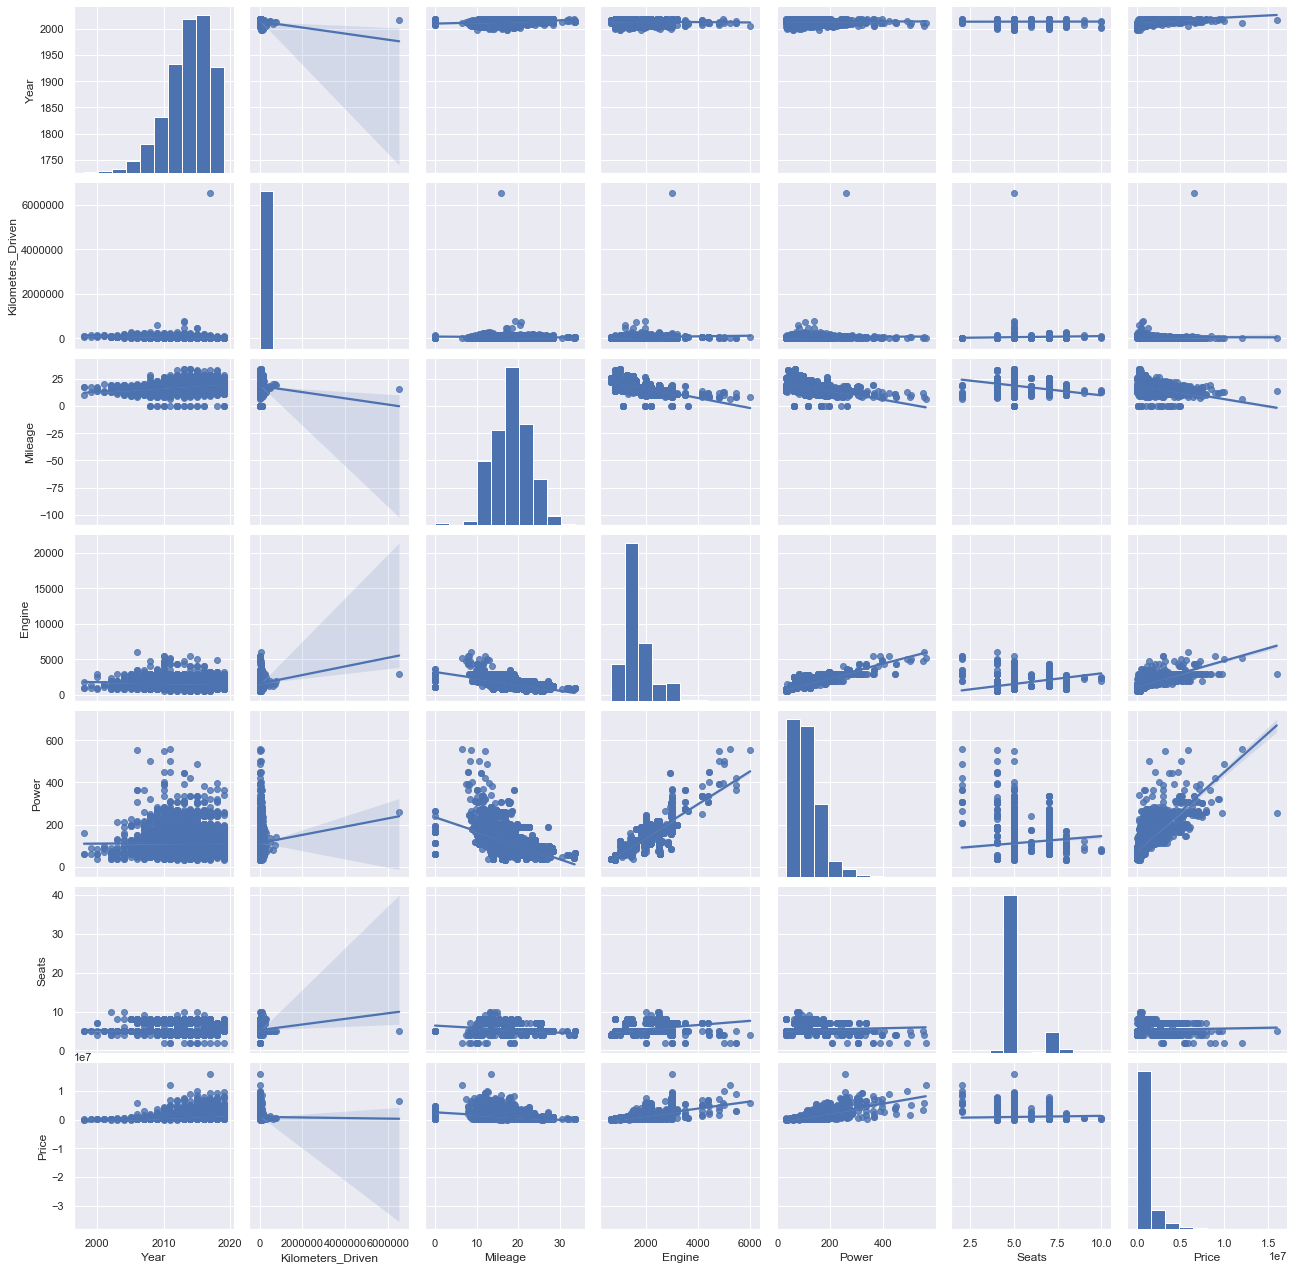

In [46]:
sns.pairplot(df,kind='reg')

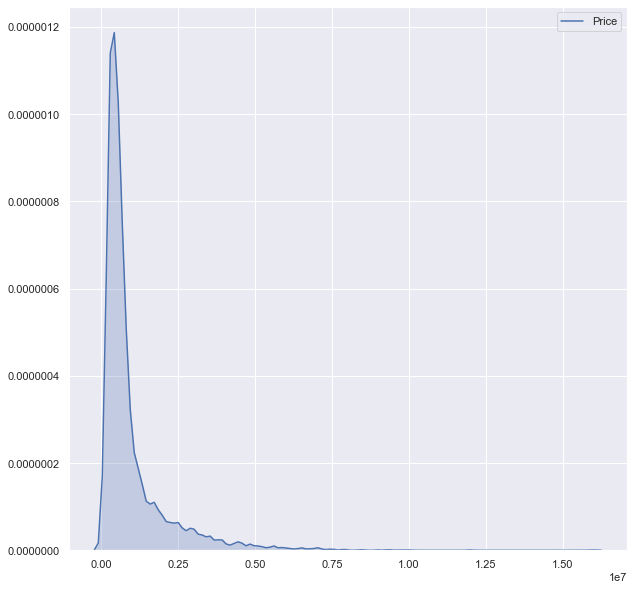

In [47]:
sns.kdeplot(df['Price'],shade=True)

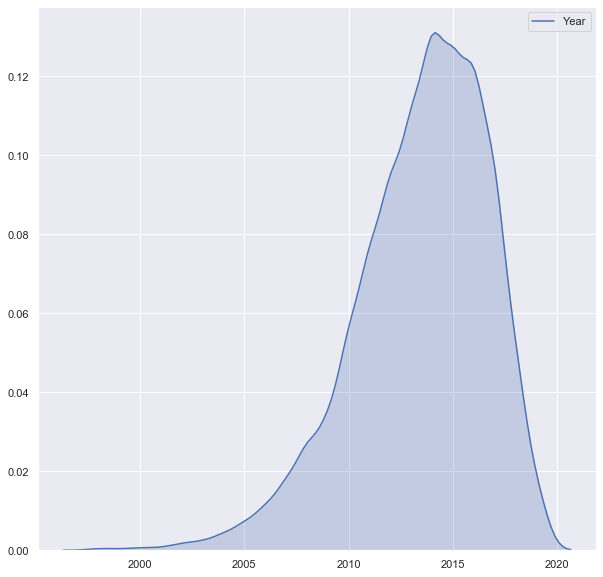

In [48]:
sns.kdeplot(df['Year'],shade=True)

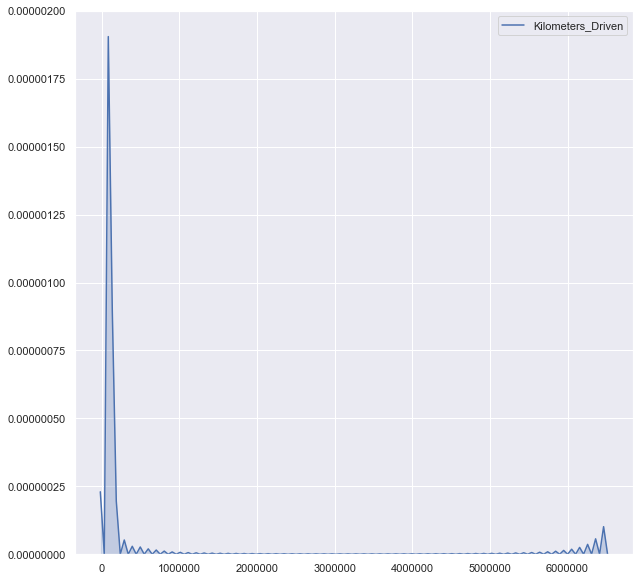

In [49]:
sns.kdeplot(df['Kilometers_Driven'],shade=True)

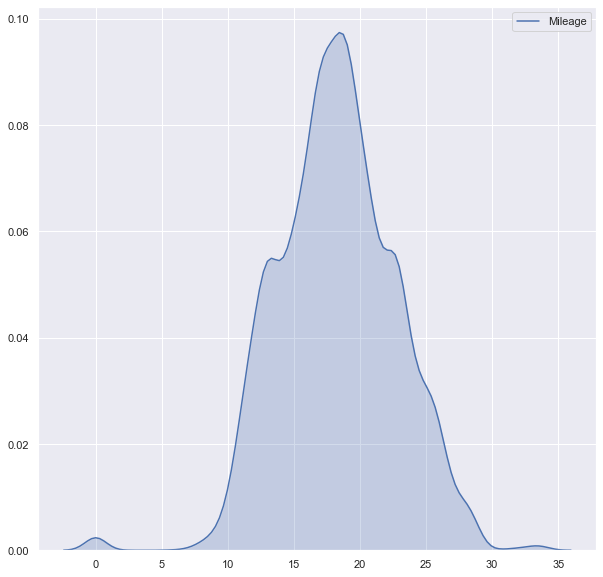

In [50]:
sns.kdeplot(df['Mileage'],shade=True)

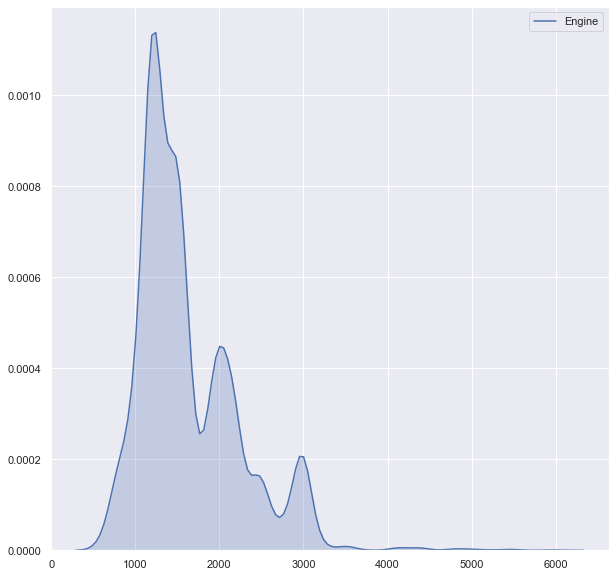

In [51]:
sns.kdeplot(df['Engine'],shade=True)

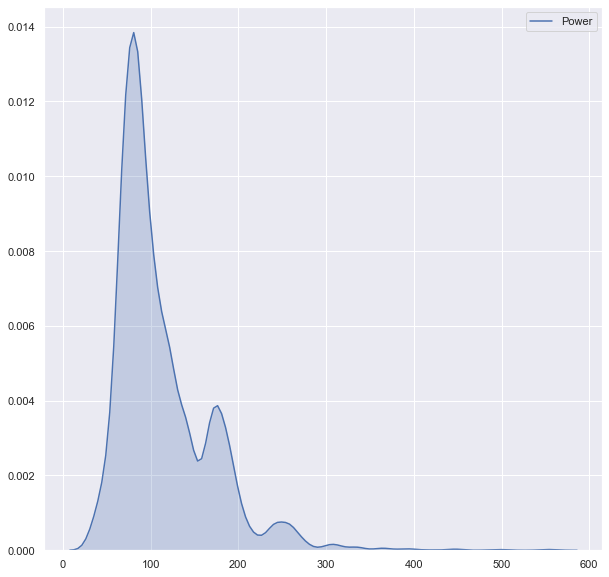

In [52]:
sns.kdeplot(df['Power'],shade=True)

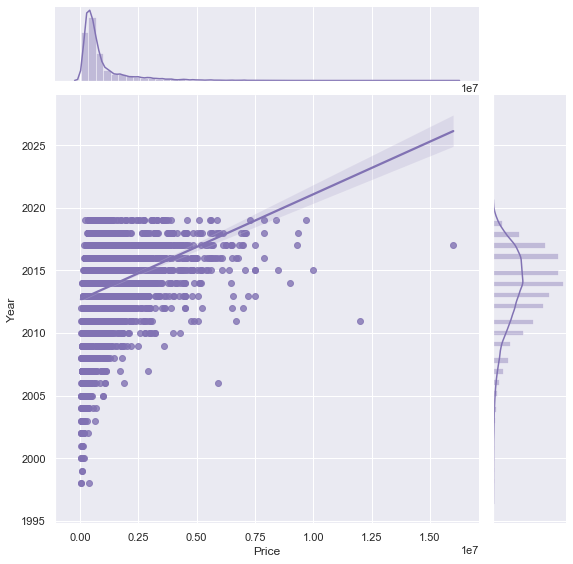

In [53]:
sns.jointplot(x='Price', y='Year', data=df, kind='reg', height=8, color='m')

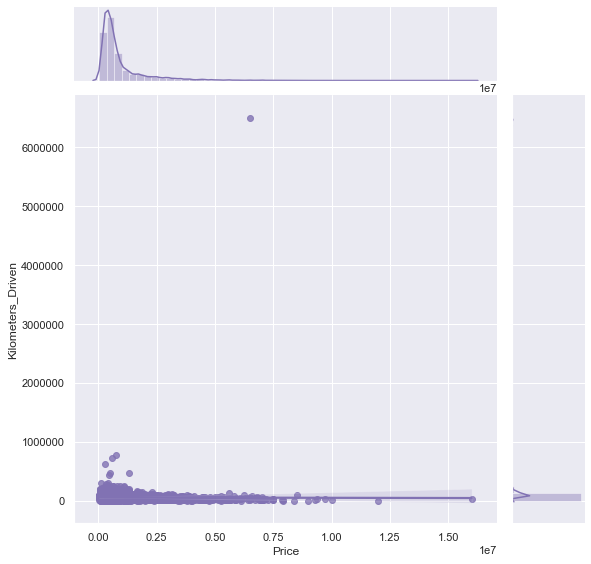

In [54]:
sns.jointplot(x='Price', y='Kilometers_Driven', data=df, kind='reg', height=8, color='m')

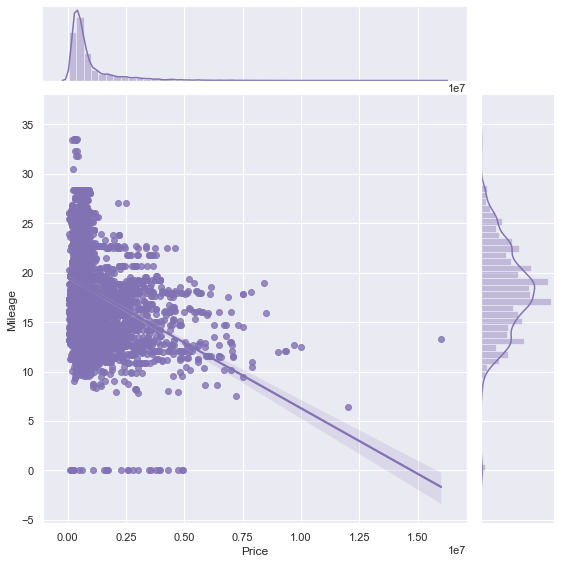

In [55]:
sns.jointplot(x='Price', y='Mileage', data=df, kind='reg', height=8, color='m')

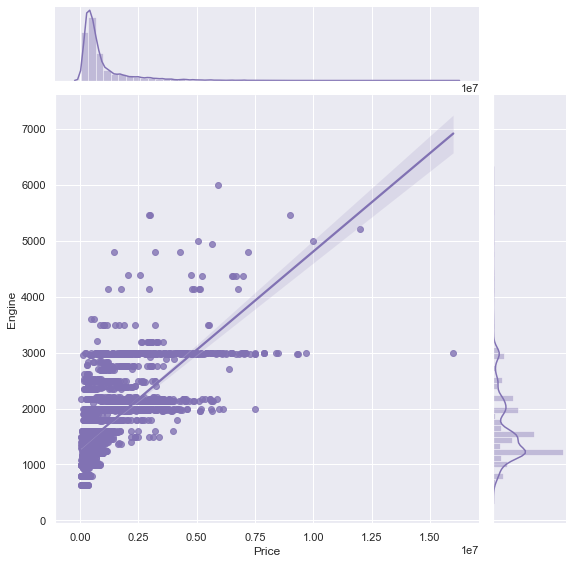

In [56]:
sns.jointplot(x='Price', y='Engine', data=df, kind='reg', height=8, color='m')

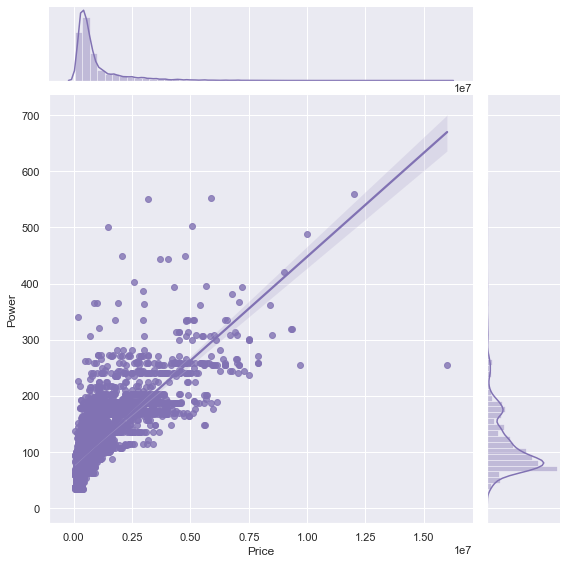

In [57]:
sns.jointplot(x='Price', y='Power', data=df, kind='reg', height=8, color='m')

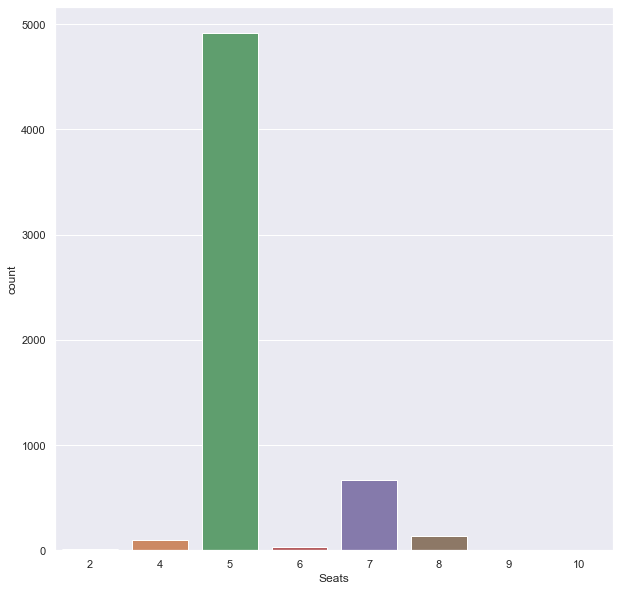

In [58]:
sns.countplot(x='Seats',data=df)

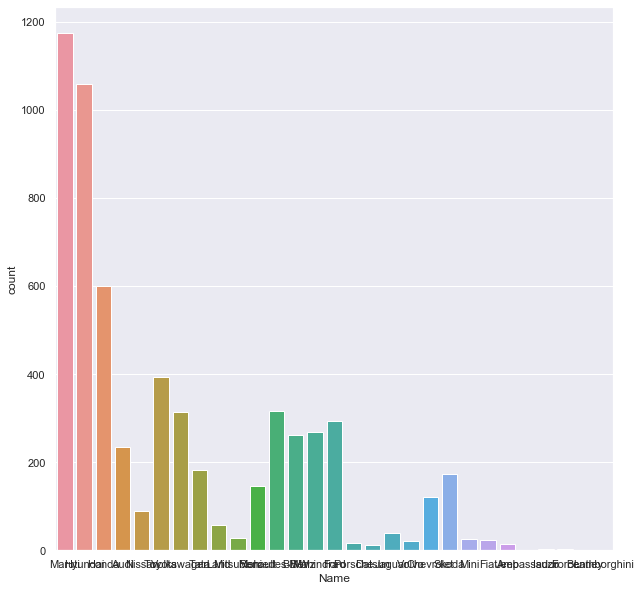

In [59]:
sns.countplot(x='Name',data=df)

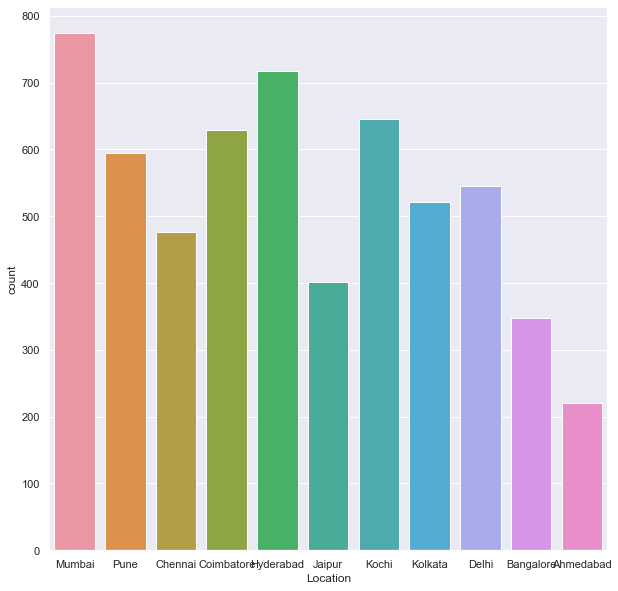

In [60]:
sns.countplot(x='Location',data=df)

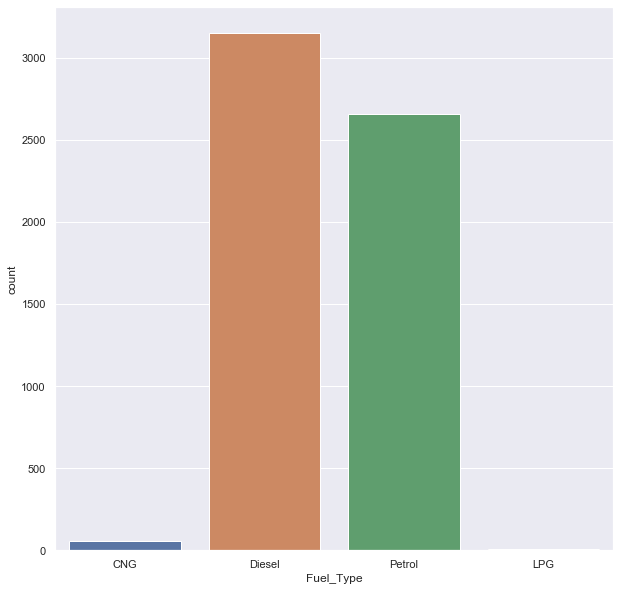

In [61]:
sns.countplot(x='Fuel_Type',data=df)

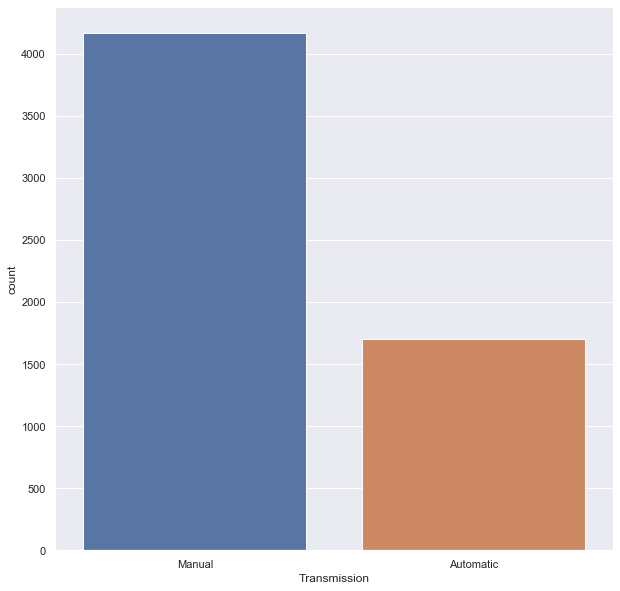

In [62]:
sns.countplot(x='Transmission',data=df)

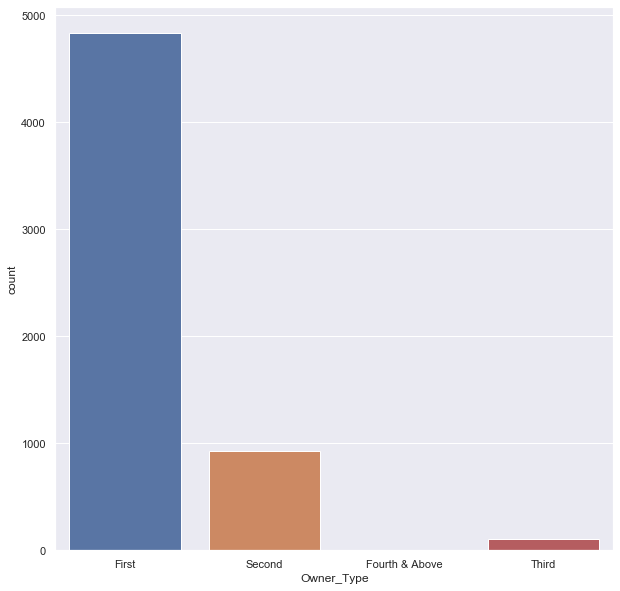

In [63]:
sns.countplot(x='Owner_Type',data=df)

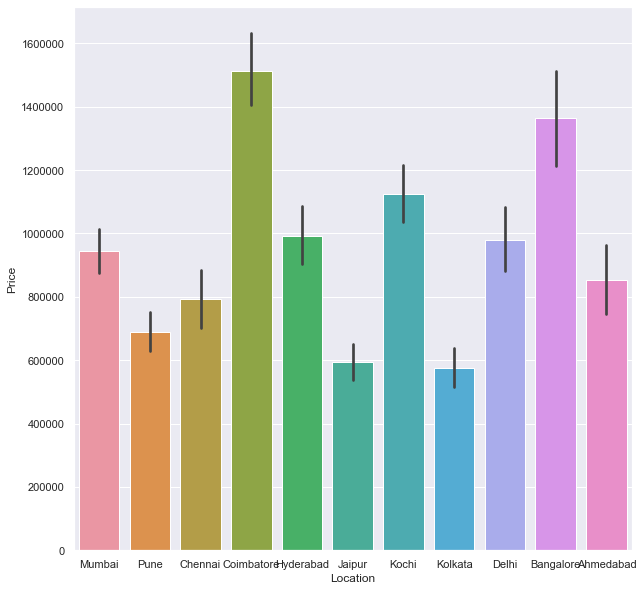

In [64]:
sns.barplot(x='Location',y='Price',data=df)

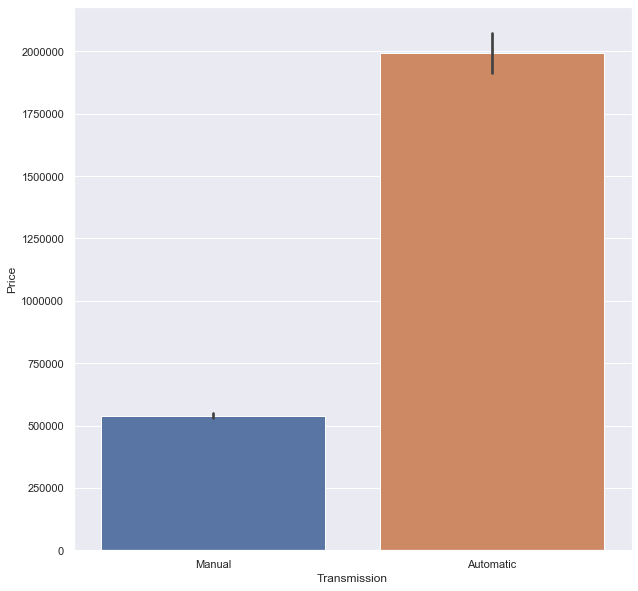

In [65]:
sns.barplot(x='Transmission',y='Price',data=df)

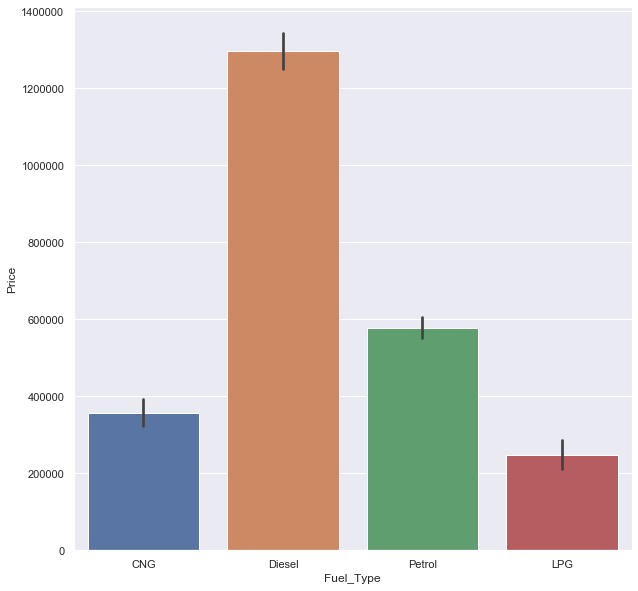

In [66]:
sns.barplot(x='Fuel_Type',y='Price',data=df)

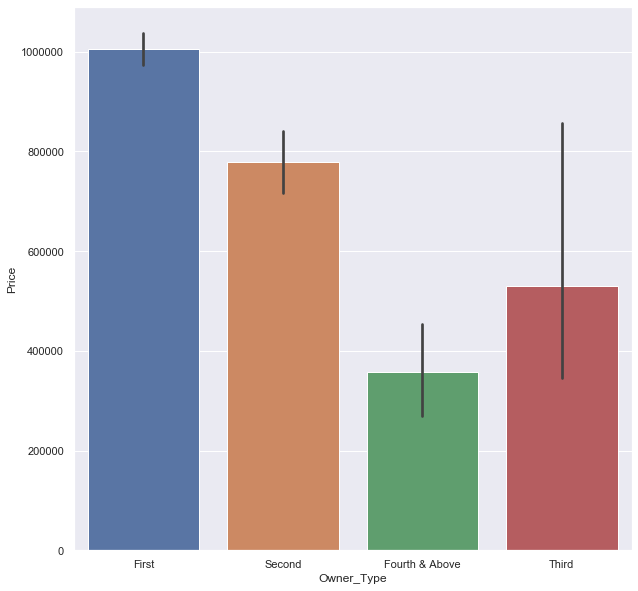

In [67]:
sns.barplot(x='Owner_Type',y='Price',data=df)

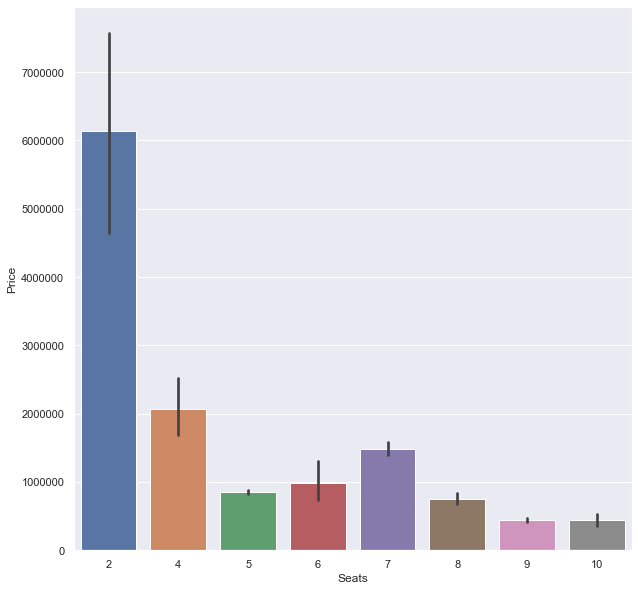

In [68]:
sns.barplot(x='Seats',y='Price',data=df)

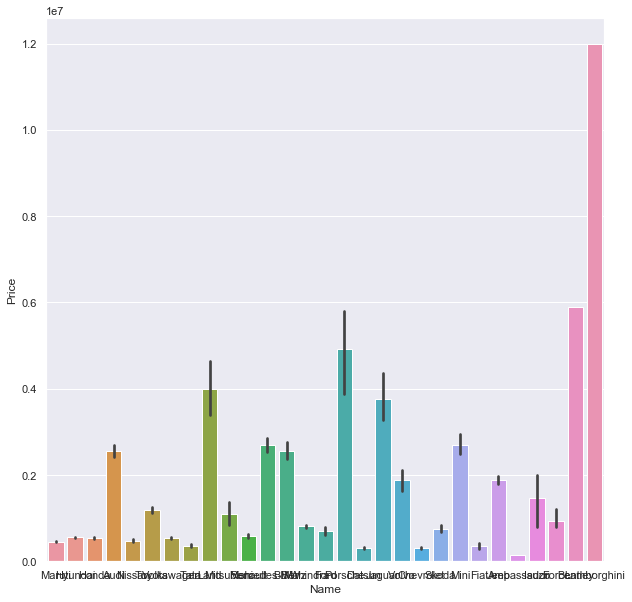

In [69]:
sns.barplot(x='Name',y='Price',data=df)

In [70]:
df[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','Price']].corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.169369,0.285623,-0.068045,0.014403,0.007833,0.299475
Kilometers_Driven,-0.169369,1.000000,-0.060608,0.093030,0.033532,0.083072,-0.008249
Mileage,0.285623,-0.060608,1.000000,-0.637258,-0.539080,-0.331576,-0.341652
Engine,-0.068045,0.093030,-0.637258,1.000000,0.866462,0.401116,0.658047
Power,0.014403,0.033532,-0.539080,0.866462,1.000000,0.101463,0.772772
Seats,0.007833,0.083072,-0.331576,0.401116,0.101463,1.000000,0.055547
Price,0.299475,-0.008249,-0.341652,0.658047,0.772772,0.055547,1.000000


# 6) Data preparing , Training & Testing

In [71]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58,5,175000.0
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126,5,1250000.0
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,89,5,450000.0
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,89,7,600000.0
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,141,5,1774000.0


In [72]:
catcolumns=['Name','Location','Fuel_Type','Transmission','Owner_Type']
for col in catcolumns:
    print(f'feature ({col}):')
    print(f' unique values: {df[col].unique()}')
    print(f'number of unique values: {len(df[col].unique())}')
    print('-'*30)

feature (Name):
 unique values: ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Ambassador' 'Isuzu' 'Force' 'Bentley' 'Lamborghini']
number of unique values: 29
------------------------------
feature (Location):
 unique values: ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
number of unique values: 11
------------------------------
feature (Fuel_Type):
 unique values: ['CNG' 'Diesel' 'Petrol' 'LPG']
number of unique values: 4
------------------------------
feature (Transmission):
 unique values: ['Manual' 'Automatic']
number of unique values: 2
------------------------------
feature (Owner_Type):
 unique values: ['First' 'Second' 'Fourth & Above' 'Third']
number of unique values: 4
------------------------------


In [73]:
label_encoder = preprocessing.LabelEncoder()

In [74]:
df['EncodedName']=label_encoder.fit_transform(df['Name'])

In [75]:
df['EncodedLocation']=label_encoder.fit_transform(df['Location'])

In [76]:
df['EncodedFuel_Type']=label_encoder.fit_transform(df['Fuel_Type'])

In [77]:
df['EncodedTransmission']=label_encoder.fit_transform(df['Transmission'])

In [78]:
df['EncodedOwner_Type']=label_encoder.fit_transform(df['Owner_Type'])

In [79]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,EncodedName,EncodedLocation,EncodedFuel_Type,EncodedTransmission,EncodedOwner_Type
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58,5,175000.0,17,9,0,1,0
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126,5,1250000.0,10,10,1,1,0
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,89,5,450000.0,9,2,3,1,0
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,89,7,600000.0,17,2,1,1,0
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,141,5,1774000.0,1,3,1,0,2


In [80]:
df.groupby('Name')['EncodedName'].unique()

Name
Ambassador        [0]
Audi              [1]
BMW               [2]
Bentley           [3]
Chevrolet         [4]
Datsun            [5]
Fiat              [6]
Force             [7]
Ford              [8]
Honda             [9]
Hyundai          [10]
Isuzu            [11]
Jaguar           [12]
Jeep             [13]
Lamborghini      [14]
Land             [15]
Mahindra         [16]
Maruti           [17]
Mercedes-Benz    [18]
Mini             [19]
Mitsubishi       [20]
Nissan           [21]
Porsche          [22]
Renault          [23]
Skoda            [24]
Tata             [25]
Toyota           [26]
Volkswagen       [27]
Volvo            [28]
Name: EncodedName, dtype: object

In [81]:
df.groupby('Location')['EncodedLocation'].unique()

Location
Ahmedabad      [0]
Bangalore      [1]
Chennai        [2]
Coimbatore     [3]
Delhi          [4]
Hyderabad      [5]
Jaipur         [6]
Kochi          [7]
Kolkata        [8]
Mumbai         [9]
Pune          [10]
Name: EncodedLocation, dtype: object

In [82]:
df.groupby('Fuel_Type')['EncodedFuel_Type'].unique()

Fuel_Type
CNG       [0]
Diesel    [1]
LPG       [2]
Petrol    [3]
Name: EncodedFuel_Type, dtype: object

In [83]:
df.groupby('Transmission')['EncodedTransmission'].unique()

Transmission
Automatic    [0]
Manual       [1]
Name: EncodedTransmission, dtype: object

In [84]:
df.groupby('Owner_Type')['EncodedOwner_Type'].unique()

Owner_Type
First             [0]
Fourth & Above    [1]
Second            [2]
Third             [3]
Name: EncodedOwner_Type, dtype: object

In [85]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'EncodedName', 'EncodedLocation', 'EncodedFuel_Type',
       'EncodedTransmission', 'EncodedOwner_Type'],
      dtype='object')

In [86]:
df.drop(['Name','Location','Fuel_Type','Transmission','Owner_Type'],axis=1,inplace=True)
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,EncodedName,EncodedLocation,EncodedFuel_Type,EncodedTransmission,EncodedOwner_Type
0,2010,72000,26.60,998,58,5,175000.0,17,9,0,1,0
1,2015,41000,19.67,1582,126,5,1250000.0,10,10,1,1,0
2,2011,46000,18.20,1199,89,5,450000.0,9,2,3,1,0
3,2012,87000,20.77,1248,89,7,600000.0,17,2,1,1,0
4,2013,40670,15.20,1968,141,5,1774000.0,1,3,1,0,2


In [87]:
x=df.drop('Price',axis=1)
y=df['Price']

In [88]:
x

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,EncodedName,EncodedLocation,EncodedFuel_Type,EncodedTransmission,EncodedOwner_Type
0,2010,72000,26.60,998,58,5,17,9,0,1,0
1,2015,41000,19.67,1582,126,5,10,10,1,1,0
2,2011,46000,18.20,1199,89,5,9,2,3,1,0
3,2012,87000,20.77,1248,89,7,17,2,1,1,0
4,2013,40670,15.20,1968,141,5,1,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
5867,2014,27365,28.40,1248,74,5,17,4,1,1,0
5868,2015,100000,24.40,1120,71,5,10,6,1,1,0
5869,2012,55000,14.00,2498,112,8,16,6,1,1,2
5870,2013,46000,18.90,998,67,5,17,8,3,1,0


In [89]:
y

0        175000.0
1       1250000.0
2        450000.0
3        600000.0
4       1774000.0
          ...    
5867     475000.0
5868     400000.0
5869     290000.0
5870     265000.0
5871     250000.0
Name: Price, Length: 5872, dtype: float64

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22,shuffle=True)

In [91]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [92]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [93]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('-'*30)

Using model: LR
Training Score: 0.7076348046224112
Test Score: 0.6661974363806925
------------------------------
Using model: KNNR
Training Score: 0.8987123251324239
Test Score: 0.8702491898311169
------------------------------
Using model: SVR
Training Score: -0.1176351329344607
Test Score: -0.11634844846885128
------------------------------
Using model: DT
Training Score: 0.9999951674749696
Test Score: 0.8213353150425255
------------------------------
Using model: RF
Training Score: 0.9844872315537758
Test Score: 0.9120586646115724
------------------------------
Using model: XGBR
Training Score: 0.9968045307613782
Test Score: 0.9231736872248382
------------------------------


In [94]:
model =XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [95]:
y_pred = model.predict(x_test)
y_pred

array([ 469854.34, 2538224.2 ,  557745.3 , ...,  748561.44,  438605.22,
        219589.39], dtype=float32)

In [96]:
y_test

3881     490000.0
2483    2345000.0
159      442000.0
2004     636000.0
557     1230000.0
          ...    
2618     341000.0
2342     642000.0
433      798000.0
3855     420000.0
1111     175000.0
Name: Price, Length: 1175, dtype: float64

In [97]:
import joblib

In [98]:
joblib.dump(model, 'model.ah')
joblib.dump(scaler, 'scaler.ah')

['scaler.ah']